```
"trainer" : false,
  "commute" : false,
  "manual" : false,
  "private" : false,
  "flagged" : false,
  "gear_id" : "b12345678987654321",
  "from_accepted_tag" : false,
  "average_speed" : 6.679,
  "max_speed" : 18.5,
  "average_cadence" : 78.5,
  "average_temp" : 4,
  "average_watts" : 185.5,
  "weighted_average_watts" : 230,
  "kilojoules" : 780.5,
  "device_watts" : true,
  "has_heartrate" : false,
  "max_watts" : 743,
  "elev_high" : 446.6,
  "elev_low" : 17.2,
  "pr_count" : 0,
  "total_photo_count" : 2,
  "has_kudoed" : false,
  "workout_type" : 10,
  "suffer_score" : null,
  "description" : "",
  "calories" : 870.2,
  ```

In [ ]:
#read a single rider's TdF stage data file and parse the JSON content into a Pandas Data Frame
# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import json

In [ ]:
def readRiderData(rider):
    s = pd.read_json("/content/tdf_stg14/{0}-14th-stage-Tour-de-France.json".format(rider))
    # calculate speed in km/h
    s['speed']= s['velocity_smooth']*3.6
    s['lat']=s['latlng'].apply(lambda ll: ll[0])
    s['long']=s['latlng'].apply(lambda ll: ll[1])
    return s

In [ ]:
rider = 'steven-kruijswijk'
s = readRiderData(rider)
s.head(5)

,altitude,watts_calc,latlng,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed,lat,long
0,329.8,0,"[43.224048, -0.002301]",0.0,72,0.0,31,0.0,0,0.0,43.224048,-0.002301
1,329.8,0,"[43.223978, -0.002327]",0.0,79,0.0,31,8.1,1,0.0,43.223978,-0.002327
2,329.8,139,"[43.223906, -0.002353]",0.0,85,0.0,31,16.4,2,0.0,43.223906,-0.002353
3,329.8,181,"[43.22383, -0.002386]",0.0,85,0.0,31,25.2,3,0.0,43.223830,-0.002386
4,329.8,180,"[43.223753, -0.0024219999999999997]",0.0,91,3.3,31,34.3,4,0.0,43.223753,-0.002422


In [ ]:
s.sample(10)

,altitude,watts_calc,latlng,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed,lat,long
10045,1176.6,34,"[42.894076, 0.056221999999999994]",5.2,65,11.2,28,103419.2,10061,18.72,42.894076,0.056222
8913,668.2,836,"[42.882428, -0.013311]",9.1,79,2.8,28,95731.0,8927,32.76,42.882428,-0.013311
7222,755.0,81,"[42.985898, -0.14185899999999999]",17.0,0,-3.8,25,74395.8,7232,61.20,42.985898,-0.141859
171,339.6,770,"[43.21153, -0.007044]",7.7,73,3.1,31,1477.4,171,27.72,43.211530,-0.007044
2705,289.8,471,"[43.144494, -0.24095699999999998]",13.9,87,2.2,28,30163.9,2710,50.04,43.144494,-0.240957
9095,734.6,134,"[42.872543, -0.0009000000000000001]",7.8,88,7.2,28,97314.8,9109,28.08,42.872543,-0.000900
10600,1434.2,174,"[42.902694, 0.08987]",9.5,77,3.1,27,106528.5,10616,34.20,42.902694,0.089870
8445,601.6,0,"[42.924126, -0.040982]",9.1,81,4.6,27,90292.5,8458,32.76,42.924126,-0.040982
20,332.0,289,"[43.222622, -0.0031379999999999997]",9.2,80,0.0,31,173.1,20,33.12,43.222622,-0.003138
5396,1071.2,0,"[42.987824, -0.276588]",5.8,66,10.7,30,54564.2,5403,20.88,42.987824,-0.276588


In [ ]:
s.sample(5)

,altitude,watts_calc,latlng,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed,lat,long
5580,1168.0,1148,"[42.981366, -0.282819]",5.0,67,7.5,30,55552.7,5588,18.00,42.981366,-0.282819
959,473.8,591,"[43.184365, -0.064259]",14.3,100,0.0,31,8359.4,962,51.48,43.184365,-0.064259
10370,1330.8,51,"[42.898856, 0.075164]",5.4,82,7.8,28,105238.9,10386,19.44,42.898856,0.075164
9865,1090.4,39,"[42.890329, 0.047264]",5.3,75,10.8,28,102335.0,9881,19.08,42.890329,0.047264
8246,524.0,0,"[42.935895, -0.048565]",11.2,93,4.0,27,88723.7,8259,40.32,42.935895,-0.048565


# Preparing train dataset

In [ ]:
s.shape

(12144, 12)

In [ ]:
cols = ['latlng', 'lat', 'long']
trainset = s.drop(cols, axis=1)

In [ ]:
df_cleaned = trainset.dropna(axis=0, how='any')

In [ ]:
df_cleaned.head(5)

,altitude,watts_calc,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed
0,329.8,0,0.0,72,0.0,31,0.0,0,0.0
1,329.8,0,0.0,79,0.0,31,8.1,1,0.0
2,329.8,139,0.0,85,0.0,31,16.4,2,0.0
3,329.8,181,0.0,85,0.0,31,25.2,3,0.0
4,329.8,180,0.0,91,3.3,31,34.3,4,0.0


In [ ]:
df_cleaned =  df_cleaned[(df_cleaned > 0).all(axis=1)]

In [ ]:
df_cleaned.shape

(7113, 9)

In [ ]:
# correlation data with zero values
correlation_matrix = trainset.corr()
correlation_matrix

,altitude,watts_calc,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed
altitude,1.000000,-0.024229,-0.458996,0.065295,0.480620,-0.279858,0.719886,0.772971,-0.458996
watts_calc,-0.024229,1.000000,0.102170,0.051359,-0.054474,-0.041216,0.023945,0.019799,0.102170
velocity_smooth,-0.458996,0.102170,1.000000,-0.336659,-0.829609,-0.280787,-0.287130,-0.302159,1.000000
cadence,0.065295,0.051359,-0.336659,1.000000,0.364129,0.056526,0.123073,0.111537,-0.336659
grade_smooth,0.480620,-0.054474,-0.829609,0.364129,1.000000,0.189089,0.357269,0.368690,-0.829609
temp,-0.279858,-0.041216,-0.280787,0.056526,0.189089,1.000000,-0.485677,-0.479228,-0.280787
distance,0.719886,0.023945,-0.287130,0.123073,0.357269,-0.485677,1.000000,0.996143,-0.287130
time,0.772971,0.019799,-0.302159,0.111537,0.368690,-0.479228,0.996143,1.000000,-0.302159
speed,-0.458996,0.102170,1.000000,-0.336659,-0.829609,-0.280787,-0.287130,-0.302159,1.000000


In [ ]:
# correlation data with df cleaned
correlation_matrix = df_cleaned.corr()
correlation_matrix

,altitude,watts_calc,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed
altitude,1.000000,-0.024288,-0.546009,-0.150882,0.508642,-0.290025,0.699482,0.762920,-0.546009
watts_calc,-0.024288,1.000000,0.073053,0.021669,-0.177845,0.007349,-0.018545,-0.019468,0.073053
velocity_smooth,-0.546009,0.073053,1.000000,0.278827,-0.687449,-0.104380,-0.267328,-0.305941,1.000000
cadence,-0.150882,0.021669,0.278827,1.000000,-0.248529,-0.070911,-0.025703,-0.044757,0.278827
grade_smooth,0.508642,-0.177845,-0.687449,-0.248529,1.000000,0.083198,0.257439,0.294262,-0.687449
temp,-0.290025,0.007349,-0.104380,-0.070911,0.083198,1.000000,-0.460022,-0.453034,-0.104380
distance,0.699482,-0.018545,-0.267328,-0.025703,0.257439,-0.460022,1.000000,0.995058,-0.267328
time,0.762920,-0.019468,-0.305941,-0.044757,0.294262,-0.453034,0.995058,1.000000,-0.305941
speed,-0.546009,0.073053,1.000000,0.278827,-0.687449,-0.104380,-0.267328,-0.305941,1.000000


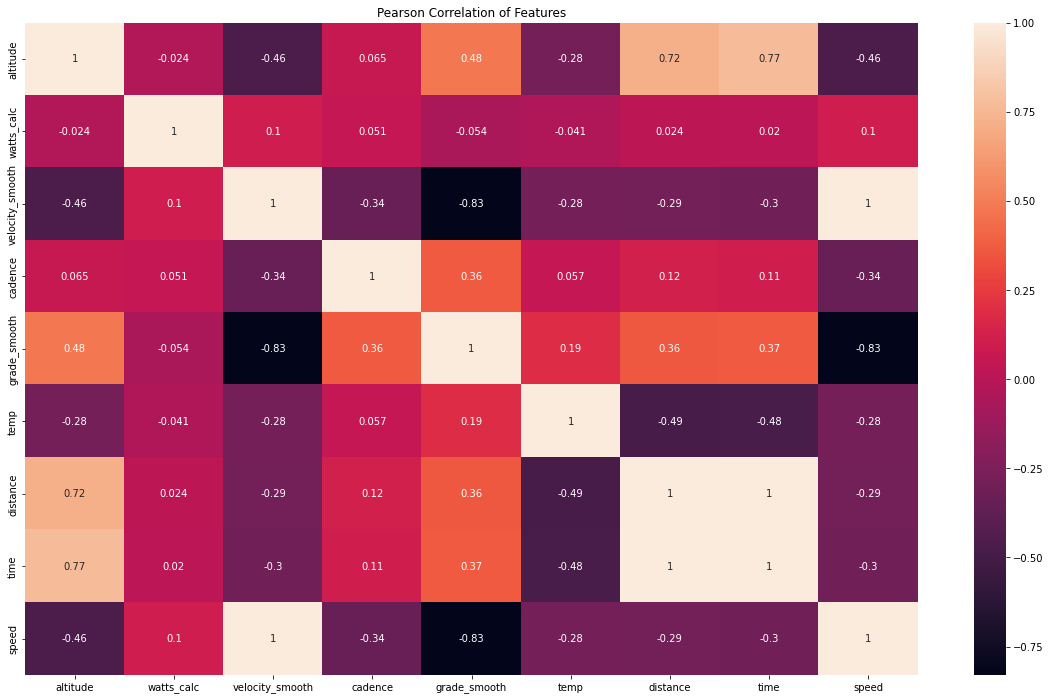

In [ ]:
plt.figure(figsize=(20.0,12.0))
plt.title('Pearson Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
# Data with zero values
# corr = trainset.corr()
# print(corr['watts_calc'].sort_values(ascending=False)[:10], '\n')

watts_calc         1.000000
speed              0.102170
velocity_smooth    0.102170
cadence            0.051359
distance           0.023945
time               0.019799
altitude          -0.024229
temp              -0.041216
grade_smooth      -0.054474
Name: watts_calc, dtype: float64 



In [ ]:
corr = df_cleaned.corr()
print(corr['watts_calc'].sort_values(ascending=False)[:10], '\n')

watts_calc         1.000000
speed              0.073053
velocity_smooth    0.073053
cadence            0.021669
temp               0.007349
distance          -0.018545
time              -0.019468
altitude          -0.024288
grade_smooth      -0.177845
Name: watts_calc, dtype: float64 



In [ ]:
corr = trainset.corr()
print(corr['cadence'].sort_values(ascending=False)[:10], '\n')

cadence            1.000000
grade_smooth       0.364129
distance           0.123073
time               0.111537
altitude           0.065295
temp               0.056526
watts_calc         0.051359
speed             -0.336659
velocity_smooth   -0.336659
Name: cadence, dtype: float64 



In [ ]:
corr = df_cleaned.corr()
print(corr['cadence'].sort_values(ascending=False)[:10], '\n')

cadence            1.000000
speed              0.278827
velocity_smooth    0.278827
watts_calc         0.021669
distance          -0.025703
time              -0.044757
temp              -0.070911
altitude          -0.150882
grade_smooth      -0.248529
Name: cadence, dtype: float64 



In [ ]:
corr = trainset.corr()
print(corr['speed'].sort_values(ascending=False)[:10], '\n')

speed              1.000000
velocity_smooth    1.000000
watts_calc         0.102170
temp              -0.280787
distance          -0.287130
time              -0.302159
cadence           -0.336659
altitude          -0.458996
grade_smooth      -0.829609
Name: speed, dtype: float64 



In [ ]:
corr = df_cleaned.corr()
print(corr['speed'].sort_values(ascending=False)[:10], '\n')

speed              1.000000
velocity_smooth    1.000000
cadence            0.278827
watts_calc         0.073053
temp              -0.104380
distance          -0.267328
time              -0.305941
altitude          -0.546009
grade_smooth      -0.687449
Name: speed, dtype: float64 



In [ ]:
trainset = df_cleaned

In [ ]:
trainset.describe()

,altitude,watts_calc,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed
count,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000
mean,991.990103,398.623647,7.155912,82.933783,6.868874,27.757205,73083.723703,7140.746380,25.761282
std,519.985547,373.443783,2.481974,9.382329,3.704927,1.642196,33212.150463,3373.566852,8.935105
min,254.000000,1.000000,2.600000,20.000000,1.400000,24.000000,43.800000,5.000000,9.360000
25%,511.600000,64.000000,5.400000,78.000000,3.600000,27.000000,49137.100000,4466.000000,19.440000
50%,902.600000,265.000000,6.300000,84.000000,6.300000,28.000000,83797.600000,7830.000000,22.680000
75%,1379.800000,742.000000,8.600000,89.000000,9.700000,29.000000,104125.400000,10188.000000,30.960000
max,2213.600000,1296.000000,19.200000,119.000000,23.500000,32.000000,115709.800000,12163.000000,69.120000


In [ ]:
trainset

,altitude,watts_calc,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed
5,329.8,207,8.8,94,3.2,31,43.8,5,31.68
6,331.0,981,9.0,91,3.2,31,53.1,6,32.40
7,331.0,180,9.2,87,3.3,31,62.5,7,33.12
14,331.0,31,8.0,67,3.5,31,120.0,14,28.80
16,332.0,785,6.6,70,3.4,31,134.0,16,23.76
...,...,...,...,...,...,...,...,...,...
12135,2210.2,512,6.5,80,8.7,30,115686.9,12158,23.40
12136,2211.2,540,6.6,85,7.9,30,115693.7,12159,23.76
12137,2211.2,1,6.5,76,10.7,30,115699.8,12160,23.40
12138,2212.4,783,6.6,76,14.9,30,115705.0,12161,23.76


In [ ]:
trainset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# normalize data
from sklearn.preprocessing import StandardScaler

target_col = ['watts_calc']
X_train = trainset.drop(target_col, axis=1)
col_Z = X_train.columns # excluir la variable target
features = X_train[col_Z]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [ ]:
features

array([[-1.27356743,  0.66245823,  1.17955733, ..., -2.19934745,
        -2.11534211,  0.66245823],
       [-1.27125951,  0.74304493,  0.85978481, ..., -2.19906741,
        -2.11504567,  0.74304493],
       [-1.27125951,  0.82363163,  0.43342146, ..., -2.19878437,
        -2.11474923,  0.82363163],
       ...,
       [ 2.34486442, -0.26428879, -0.73907777, ...,  1.28323736,
         1.48792264, -0.26428879],
       [ 2.34717234, -0.22399545, -0.73907777, ...,  1.28339394,
         1.48821908, -0.22399545],
       [ 2.34948026, -1.02986242,  1.81910236, ...,  1.28353848,
         1.48881196, -1.02986242]])

In [ ]:
y = trainset.watts_calc
X = features

In [ ]:
y

5        207
6        981
7        180
14        31
16       785
        ... 
12135    512
12136    540
12137      1
12138    783
12140    754
Name: watts_calc, Length: 7113, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.20)

In [ ]:
X_train.shape, X_test.shape

((5690, 8), (1423, 8))

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [ ]:
model = lr.fit(X_train, y_train)

In [ ]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.03609440013467935


In [ ]:
predictions = model.predict(X_test)

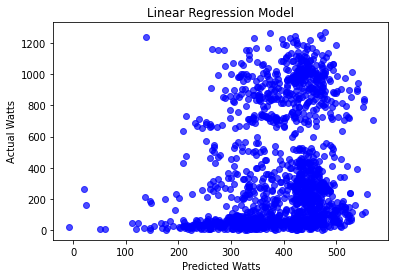

In [ ]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Watts')
plt.ylabel('Actual Watts')
plt.title('Linear Regression Model')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 136793.14671070038
